# Librerías

In [95]:
import numpy as np
import pandas as pd 
import cv2
from fastai.vision import *
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil
from glob import glob
%matplotlib inline
import networkx as nx

import networkx as nx
import nxviz
import community
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import operator

import sys
from PIL import Image

In [96]:
plt.rcParams['figure.figsize'] = (15, 15)

In [97]:
#img = mpimg.imread('data/images/images/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg')
#print(img)
#imgplot = plt.imshow(img)

# Funciones

In [98]:
def plotImages(artist,directory):
    print(artist)
    multipleImages = glob(directory)
    plt.subplots_adjust(wspace=0, hspace=0)
    i_ = 0
    for l in multipleImages[:36]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128, 128)) 
        plt.subplot(6, 6, i_+1) #.set_title(l)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
        i_ += 1

In [99]:
def draw(G, pos, measures, measure_name, logscale=False, labels=False):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap="Greens", 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_edgecolor('k')
    
    if logscale:
        nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    if labels:
        labels = nx.draw_networkx_labels(G, pos)
        
    edges = nx.draw_networkx_edges(G, pos)
    #nx.draw(G, with_labels=True) 
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [100]:
def df_to_dfgraph(df, nodes, edges):
    
    """
    Crea un dataframe con las relaciones entre los nodos.
    Input : 
    *df: dataframe origen
    *nodes : columna del df que quiere usarse de nodos
    *edges : columna del df que quiere usarse de enlace
    
    Output:
    *df: con las relaciones
    
    """
    
    #Con esto obtenemos la lista de tuplas
    lst = [(str(df[edges][i]),df[nodes][i]) for i in range(0, len(df[nodes]))]
    #Pasamos a diccionario
    d = {}
    for k, v in lst:
        d.setdefault(k, []).append(v)
        
    d.pop('None', None)

    #Creamos las permutaciones de los valores del dict
    lst2 = [list(itertools.combinations(i, 2)) for i in d.values()]
    
    #Por último sacamos las tuplas de las listas para obtener solo una lista de tuplas y no una lista
    #de listas de tuplas.
    total_relationships=[]
    for i in lst2:
        for e in i:
            total_relationships.append(e)
            
    #Convertimos el listado de tuplas en un dataframe
    df = pd.DataFrame(total_relationships, columns = ["Name_x", "Name_y"])
        
    return df

# Importar y visualizar el dataset

In [101]:
art_csv = pd.read_csv("data/artists.csv")

In [102]:
art_csv.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [103]:
len(art_csv['paintings'])

50

In [104]:
art_csv = art_csv[["name", 'paintings', "genre"]].sort_values(by=["paintings"], ascending = False)

In [105]:
art_csv.reset_index(inplace = True)

In [106]:
genre2 = pd.DataFrame(art_csv.genre.str.split(',',2).tolist(),
                                   columns = ['genre',"genre2",'genre3'])

In [107]:
art_csv = art_csv[["name","paintings"]].join(genre2)

In [108]:
art_csv

,name,paintings,genre,genre2,genre3
0,Vincent van Gogh,877,Post-Impressionism,None,None
1,Edgar Degas,702,Impressionism,None,None
2,Pablo Picasso,439,Cubism,None,None
3,Pierre-Auguste Renoir,336,Impressionism,None,None
4,Albrecht Dürer,328,Northern Renaissance,None,None
5,Paul Gauguin,311,Symbolism,Post-Impressionism,None
6,Francisco Goya,291,Romanticism,None,None
7,Rembrandt,262,Baroque,None,None
8,Alfred Sisley,259,Impressionism,None,None
9,Titian,255,High Renaissance,Mannerism,None


Edgar Degas


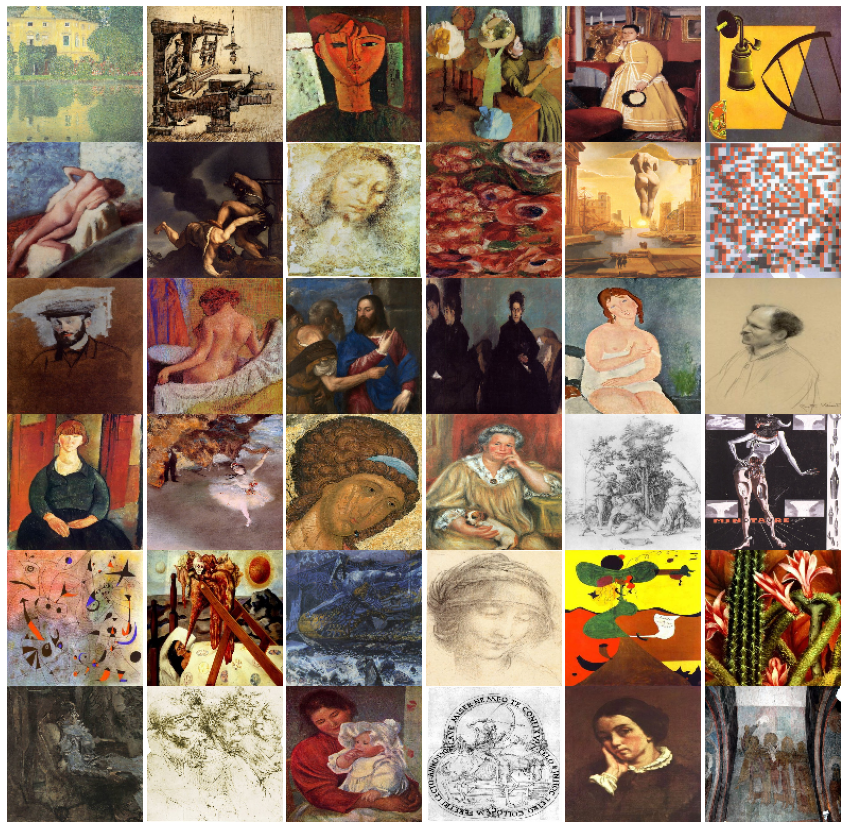

In [109]:
plotImages("data/resized/resized/**")

In [14]:
graph = df_to_dfgraph (art_csv, "name", "genre")
graph2 = df_to_dfgraph (art_csv, "name", "genre2")
graph3 = df_to_dfgraph (art_csv, "name", "genre3")

In [15]:
data = pd.concat([graph, graph2, graph3])

In [16]:
G = nx.from_pandas_edgelist(data, 'Name_x', 'Name_y')

In [17]:
pos = nx.spring_layout(G)

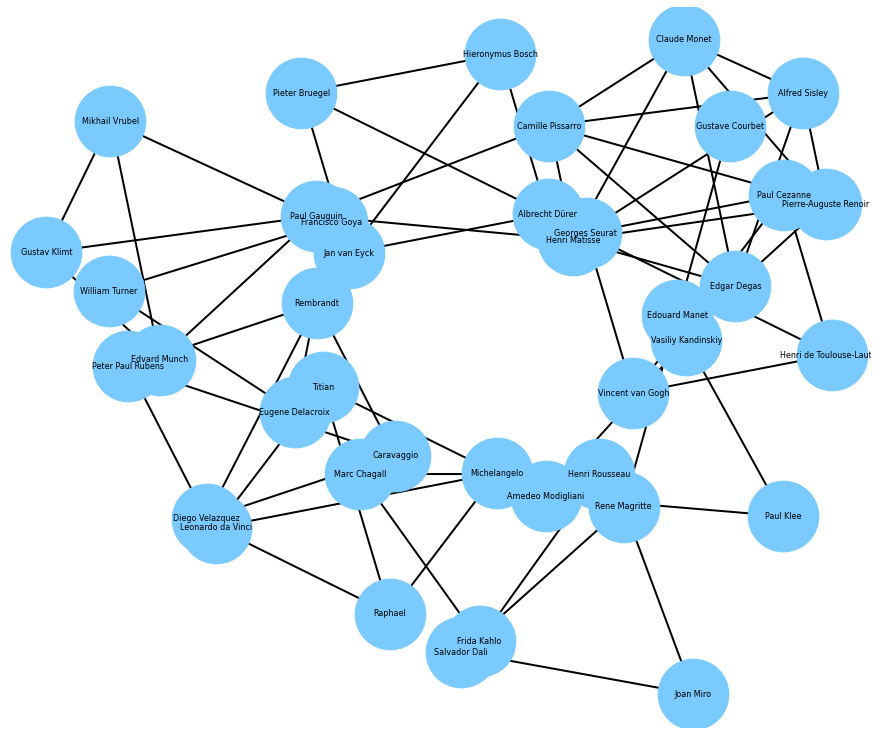

In [84]:
plt.figure(figsize=(12,10))

img = nx.draw_kamada_kawai(G, node_size=5000,
                     alpha=1,width=2, with_labels=True, node_color = "#7acaff" ,font_size = 8)

In [93]:
img.save('img/grapho.jpg',)

AttributeError: 'NoneType' object has no attribute 'save'